In [76]:
import time
import gym
import gym_ple
import tensorflow as tf
import matplotlib.pyplot as plt
import imageio

PREVIOUS_ACTION_MEMORY = 100

env = gym.make('FlappyBird-v0')
env.reset()
observation, reward, done, info = env.step(0)

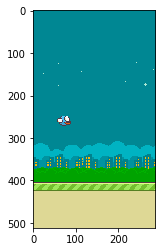

In [77]:
def showimage(array, cmap=None):
    plt.imshow(array, cmap=cmap)
    plt.show()
    
showimage(observation)

(512, 288)


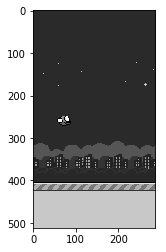

In [95]:
# Test grayscale conversion
sess = tf.InteractiveSession()
grayscale = tf.image.rgb_to_grayscale(observation).eval()
grayscale = tf.reshape(grayscale, (grayscale.shape[0], grayscale.shape[1])).eval()
print(grayscale.shape)
showimage(grayscale, cmap='gray')

(512, 288, 3)


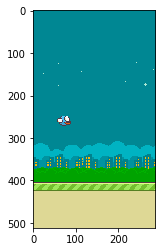

(128, 72, 3)


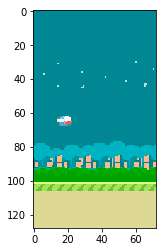

In [94]:
# Test Pooling
sess = tf.InteractiveSession()
screen = observation
screen = tf.reshape(screen, (1, *screen.shape)).eval()
print(screen[0].shape)
showimage(screen[0])

screen = tf.nn.max_pool(screen, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME').eval()
screen = tf.nn.max_pool(screen, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME').eval()

print(screen[0].shape)
showimage(screen[0])

In [96]:
# Build network
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

